<a href="https://colab.research.google.com/github/nbrk88/Projeto/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Titanic**

O Desafio Titanic é uma das competições mais famosas que encontramos na plataforma de banco de dados do Kaggle, é considerado a etapa inicial para o mundo de Data Science (Ciência de Dados).

Exemplificado pela a Análise Técnica do professor ***Carlos Melo*** (Sigmoidal), seguindo algumas informações apresentadas em seu código. [AQUI](https://github.com/carlosfab/data_science/blob/master/Titanic.ipynb//)

Este Colab tem por objetivo realizar uma análise exploratória dos fatos retirados do Dataset, demonstrando a manipulação dos dados(limpeza, verificação de variáveis faltantes e análise das informações obtidas) e visualização gráfica para auxílio da identificação do problema.

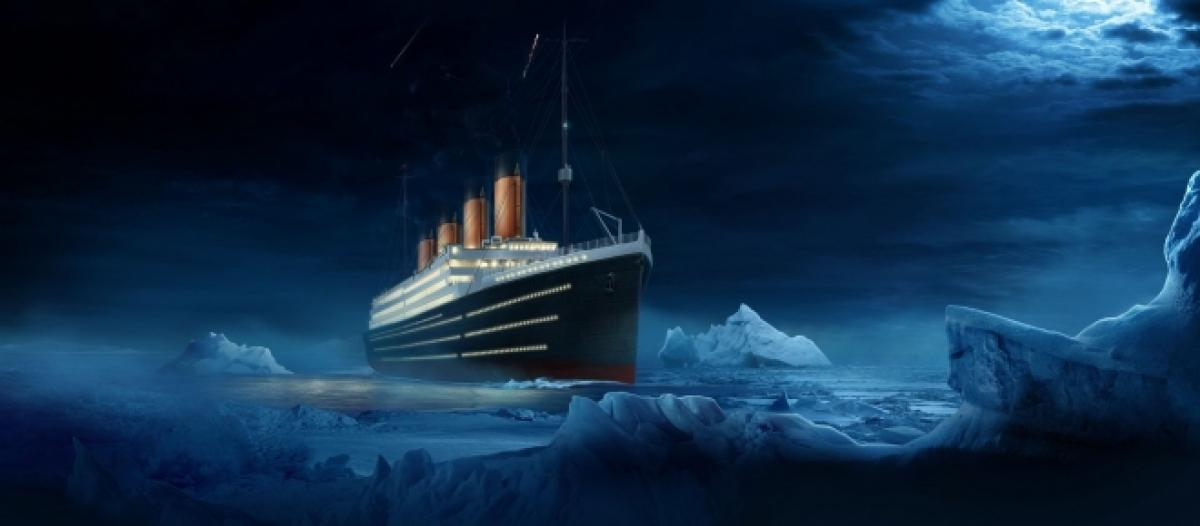

## História do Titanic

Nessa história romântica entre Rose e Jack, tendo como soundtrack de Celine Dion ('My heart will go on')

Depois eu coloco o resumo....

## Acesso ao Google Drive

Com a importação da biblioteca 'google.colab', consigo acessar o arquivo do desafio salvo em meu Google Drive.

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
os.listdir()

['.config', 'gdrive', 'sample_data']

In [ ]:
os.chdir('/content/gdrive/My Drive/titanic')

In [ ]:
os.listdir()

['train.csv',
 'gender_submission.csv',
 'test.csv',
 'imagem-do-famoso-transatlantico-titanic_399203.jpg']

## Importando o Dataset 

Com o auxílio da biblioteca 'Pandas', importo o arquivo do desafio em formato 'csv' para um dataframe.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
# índices do dataframe
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Legenda dos índices

Como visto anteriormente, os itens que apresentam os valores das colunas representam os índices do nosso dataframe, ou seja, são as variáveis que trabalharemos nesse notebook.

As variáveis se dividem em doze categorias:

* **PassengerId:** Número de identificação do passageiro
* **Survived:** Informa se o passageiro sobreviveu ao desastre
  * 0 = Não sobreviveu
  * 1 = Sobreviveu
* **Pclass:** Divisão onde o passageiro estava
  * 1 = 1ª Classe
  * 2 = 2ª Classe
  * 3 = 3ª Classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de cônjuges e irmãos a bordo
* **Parch:** Quantidade de pais e filhos a bordo
* **Ticket:** Número da passagem
* **Fare:** Preço da passagem
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Porto do qual o passageiro embarcou
  * C = Cherbourg
  * Q = Queenstown
  * S = Southampton

In [ ]:
# quantidade de entradas de dados do dataframe
print(f"Entradas\nLinhas: {df.shape[0]}\nColunas: {df.shape[1]}")

Entradas
Linhas: 891
Colunas: 12


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# descritivo resumido dos dados (contagem, média, mediana, mínimo, máximo, primeiro, segundo e terceiro quadrantes)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Verificando dados faltantes do arquivo



Conseguimos identificar que há dados faltantes nas variáveis 'Cabin', 'Age' e 'Embarked' em relação ao valor total de entradas(891).

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

A partir da quantidade de dados faltantes, agora podemos verificar o percentual representado de cada variável em cima do Total.

In [ ]:
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

## Tipos de variáveis

Neste Dataframe podemos verificar que existem diferentes classes de entradas para as nossas variáveis.

* Int: Valores numéricos inteiros
* Float: Valores numéricos em decimais
* Obj: Entradas de texto


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

A partir das nossas variáveis numéricas(int e float), conseguimos criar resumidamente alguns gráficos para facilitar a nossa visualização de dados iniciais.

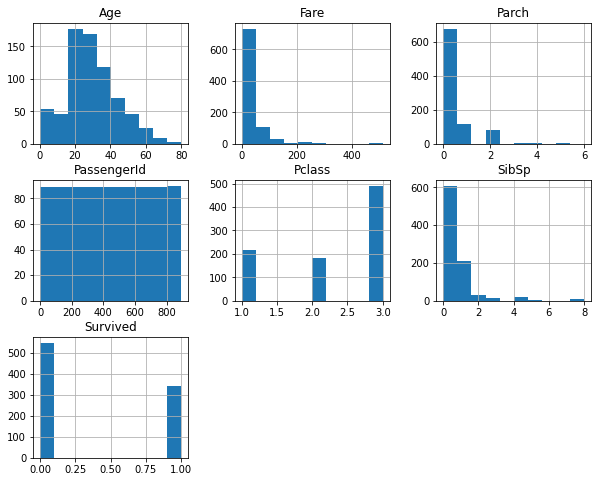

In [ ]:
df.hist(figsize=(10,8));

## Taxa de sobrevivência

In [ ]:
# número total de sobreviventes dividos entre homens e mulheres
# lembrando que '0': Não sobrevivente e '1': Sobrevivente
df.groupby(['Sex', 'Survived']).count()['PassengerId']

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [ ]:
# sobreviventes mulheres do Titanic
mulheres = df.groupby(['Sex', 'Survived']).count()['PassengerId'][0]
mulherestotal = df.groupby(['Sex', 'Survived']).count()['PassengerId'][0] + df.groupby(['Sex', 'Survived']).count()['PassengerId'][1]
print(f'Total de mulheres que não sobreviveram ao desastre: {mulheres}')
print(f'Total de mulheres: {mulherestotal}')
print(f'O percentual de não sobreviventes mulheres é de: {mulheres/mulherestotal * 100:.2f}')

Total de mulheres que não sobreviveram ao desastre: 81
Total de mulheres: 314
O percentual de não sobreviventes mulheres é de: 25.80


In [ ]:
# sobreviventes homens do Titanic
homens = df.groupby(['Sex', 'Survived']).count()['PassengerId'][2]
homenstotal = df.groupby(['Sex', 'Survived']).count()['PassengerId'][2] + df.groupby(['Sex', 'Survived']).count()['PassengerId'][3]
print(f'Total de homens que não sobreviveram ao desastre: {homens}')
print(f'Total de homens: {homenstotal}')
print(f'O percentual de não sobreviventes homens é de: {homens/homenstotal * 100:.2f}')

Total de homens que não sobreviveram ao desastre: 468
Total de homens: 577
O percentual de não sobreviventes homens é de: 81.11


In [ ]:
# em média, a chance de sobreviência por sexo
df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
# a média de sobrevivência e a média da idade por sexo
df[['Sex', 'Survived', 'Age']].groupby(['Sex']).mean()

,Survived,Age
Sex,,
female,0.742038,27.915709
male,0.188908,30.726645


## Análise Gráfica

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


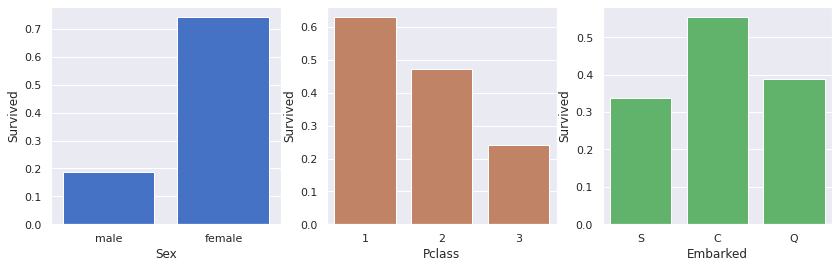

In [ ]:
# quantidade de sobreviventes por 'Sexo', 'Classe' e 'Local de Embarque'
sns.set(rc={'figure.figsize':(12,10)})
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(14,4))

sns.barplot(x='Sex', y='Survived', data=df, ax=axis1, ci=False, color='#316CDA')
sns.barplot(x='Pclass', y='Survived', data=df, ax=axis2, ci=False, color='#CF7D57')
sns.barplot(x='Embarked', y='Survived', data=df, ax=axis3, ci=False, color='#54BF61');

### A divisão entre as variáveis sexo, classe e o local de embarque têm correlação com a taxa de sobrevivência dos tripulantes?



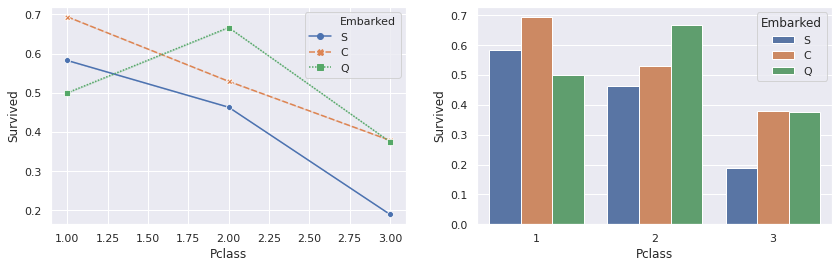

In [ ]:
# correlação de taxa de sobreviventes com a 'Classe' x 'Local de Embarque'
fig, (axis1, axis2) = plt.subplots(1,2, figsize = (14,4))
sns.lineplot(x = 'Pclass', y = 'Survived', data = df, hue = 'Embarked', style = 'Embarked', markers = True,  ci = False, ax = axis1)
sns.barplot(x = 'Pclass', y = 'Survived', data = df, hue = 'Embarked', ci = False, ax = axis2);

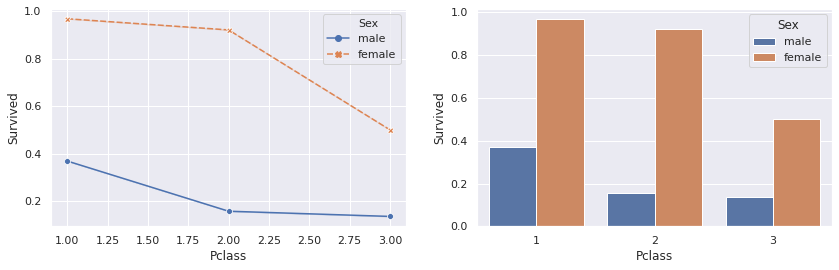

In [ ]:
# correlação de taxa de sobreviventes entre 'Sexo' x 'Classe'
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(14,4))
sns.lineplot(x = 'Pclass', y = 'Survived', data = df, hue = 'Sex', style = 'Sex', markers = True,  ci = False, ax = axis1)
sns.barplot(x = 'Pclass', y = 'Survived', data = df, hue = 'Sex', ci = False);

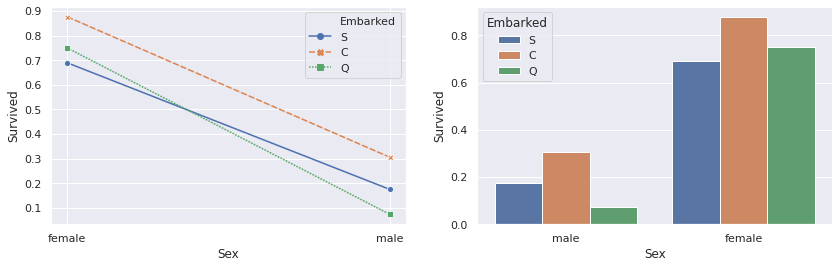

In [ ]:
# correlação de taxa de sobreviventes entre 'Sexo' x 'Local de Embarque'
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(14,4))
sns.lineplot(x = 'Sex', y = 'Survived', data = df, hue = 'Embarked', style = 'Embarked', markers = True,  ci = False, ax = axis1)
sns.barplot(x = 'Sex', y = 'Survived', data = df, hue = 'Embarked', ci = False);

# Conclusão

Sim, há ligação entre as variáveis para alteração da taxa de sobrevivência.

Podemos verificar a correlação direta que o *Sexo*, a *Classe* e o *Local de Embarque* do tripulante exerce sobre a chance do passageiro sobreviver.

A partir dos fatos já conhecidos no modo geral, como imaginado a maioria dos sobreviventes foram mulheres, ao analisarmos com mais precisão os gráficos, chegamos ao ponto que mulheres na faixa de seus 27 anos, que estavam na 1ª e 2ª Classes e que embarcaram nas cidades de Queenstown e Cherburg tinham mais chances chegando próximo dos 70% de probabilidade de sairem vivas da tragédia.

Já os homens apresentam um percentual de sobrevivência totalmente oposto, sabemos que homens de aproximadamente 30 anos, que estavam na 2ª e 3ª Classe, que embarcaram nas cidades de Queenstown e Southampton não tiveram a mesma sorte, mostrando cerca de menos de 20% de percentual de sobrevivência ao desastre.

De acordo com os dados retirados do Desafio, posso afirmar que no meu caso eu não sobreviveria ao desastre, pois me encaixo na faixa etária dos homens, independente do local de embarque não teria muitas chances de sair vivo, talvez o fato que poderia alterar a taxa seria somente a classe do embarque aumentar a probabilidade para próximo dos 40%. 